<a href="https://colab.research.google.com/github/KuvinaDesch/MAT421/blob/main/ModB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Interpolation is a very important concept in computing.  Essentially, if you have a set of data points, you want to create a function that passes through all the points.  You can then use this function to find expected values even when you don't have data around that value.  Unlike regression, you do not have existing knowledge about how the function should look (although the function should usually be continuous).

Linear interpolation is the simplest approach.  It is essentially just connect the dots.  So if you have 2 consecutive data points (x_i, y_i) and (xi+1, yi+1), you can determine the expected value for y(x) for any value x in between them (xi < x < xi+1), by using the line between the 2 points.  This is done with the formula:

y(x) = yi + (yi+1 - yi)(x - xi)/(xi+1 - xi).

For example, if we're given (1, 3) and (4, 2.7), and we want to find y(2), we would use the formula as follows:

y(2) = 3 + (2.7 - 3)(2 - 1)/(4 - 1) = 3 + (-0.3)(1)/3 = 3 - 0.1 = 2.9

y hat =  2.9


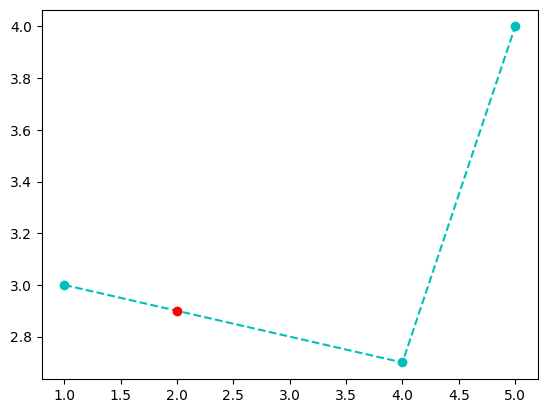

In [46]:
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt

xvalues = [1, 4, 5]
yvalues = [3, 2.7, 4]
f = interpolate.interp1d(xvalues,yvalues)

x = 2
yhat = f(x)

# sure enough, we can use scipy's interpolate's interp1d and we get 2.9
print("y hat = ", yhat)  

# matplotlib.pyplot does linear interpolation automatically to draw lines
plt.plot(xvalues, yvalues, '--oc') 
plt.plot(x, yhat, 'or')

Linear interpolation can be good, but it also can lead to jagged lines.  A method to interpolate more smoothly is cubic spline interpolation.  Instead of connecting the points with straight lines, we connect them with piecewise cubic functions.  To connect the points for xi and xi+1, we use a cubic function of the form:

Si(x) = aix^3 + bix^2 + cix + di.

The constraints are to make both endpoints end up where they're supposed to.

for i from 1 to n-1  
Si(xi) = yi  
Si(xi+1) = yi+1

There are 4 coefficients, but we only have 2 constaints, so there are still infinitely many ways to do this.  What we do is add more constraints.  Specifically, that the first and second derivatives (slope and concavity) match for consecutive functions.

for i from 1 to n-2  
Si'(xi+1) = Si+1'(xi+1)  
Si''(xi+1) = Si+1''(xi+1)  

These don't apply to the endpoints of the data, so we need 2 more constraints.  The typical ones are to make there be 0 concavity at the endpoints

S1''(x1) = 0  
Sn-1''(xn) = 0

This is difficult to do manually, but luckily we can make python do it for us

y hat =  2.2


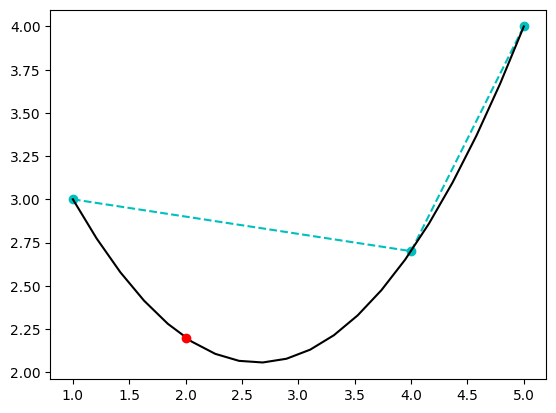

In [53]:
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt

xvalues = [1, 4, 5]
yvalues = [3, 2.7, 4]
f = interpolate.CubicSpline(xvalues,yvalues)

# matplotlib.pyplot does linear interpolation automatically to draw lines
# so we had to use numpy's linspace to make points based on the new function
xvalues2 = np.linspace(1, 5, 20)
yvalues2 = f(xvalues2)

x = 2
yhat = f(x)

# using cubic spline interpolation, we get 2.2 instead
print("y hat = ", yhat)  

# It still fits the 3 points, but is much smoother.
plt.plot(xvalues, yvalues, '--oc') 
plt.plot(xvalues2, yvalues2, 'k') 
plt.plot(x, yhat, 'or')

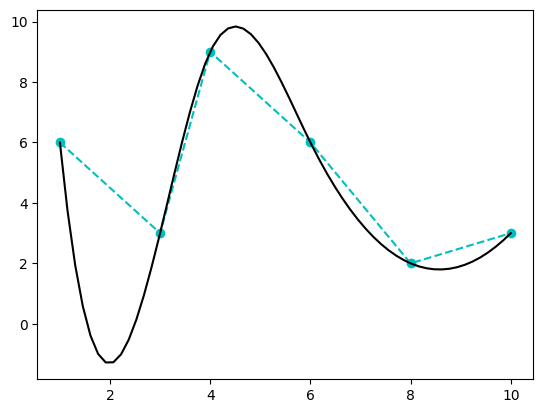

In [91]:
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt

# here is another example of cubic spline interpolation

x = [1, 3, 4, 6, 8, 10]
y = [6, 3, 9, 6, 2, 3]

f = interpolate.CubicSpline(x, y)

x2 = np.linspace(1, 10, 60)
y2 = f(x2)

plt.plot(x, y, '--co')
plt.plot(x2, y2, 'k')

Using cubic spline interpolation by hand is trick, but it is possible, so how do we go about doing that?  Well essentially, you will end up with 4(n-1) variables, and 4(n-1) linear equations.  We can solve this using linear algebra by arranging these into a matrix.  For example, let's say x = [0, 1, 2] and y = [3, 5, 4].  First of all, we are going to end up with

S1(x) = a1x^3 + b1x^2 + c1x + d1  
S2(x) = a2x^3 + b2x^2 + c2x + d2  

To make the points match, we need S1(0) = 3, S1(1) = 5, S2(1) = 5, and S2(2) = 4.  Using the full forms of the equations,

3 = 0a1 + 0b1 + 0c1 + d1  
5 = a1 + b1 + c1 + d1  
5 = a2 + b2 + c2 + d2  
4 = 8a2 + 4b2 + 2c2 + d2

Now to make the first and second derivatives match, we take those of both functions.

Si'(x) = 3aix^2 + 2bix + ci  
Si''(x) = 6aix + 2bi

So applying those, we know

3a1 + 2b1 + c1 = 3a2 + 2b2 + c2  
6a1 + 2b1 = 6b2 + 2b2

In other words,

3a1 + 2b1 + c1 - 3a2 - 2b2 - c2 = 0  
6a1 + 2b1 - 6b2 - 2b2 = 0  

Finally, to make the 2 endpoints of the data have 0 concavity,


2b1 = 0  
12a2 + 2b2 = 0

Now we have a system of 8 equations and 8 variables.

3 = 0a1 + 0b1 + 0c1 + d1  
5 = a1 + b1 + c1 + d1  
5 = a2 + b2 + c2 + d2  
4 = 8a2 + 4b2 + 2c2 + d2  
0 = 3a1 + 2b1 + c1 - 3a2 - 2b2 - c2  
0 = 6a1 + 2b1 - 6a2 - 2b2  
0 = 2b1  
0 = 12a2 + 2b2

These are arranged in a matrix A:

0  0  0  1  0  0  0  0  
1  1  1  1  0  0  0  0  
0  0  0  0  1  1  1  1  
0  0  0  0  8  4  2  1  
3  2  1  0 -3 -2 -1  0  
6  2  0  0 -6 -2  0  0  
0  2  0  0  0  0  0  0  
0  0  0  0 12  2  0  0

Together with column vectors b = (3, 5, 5, 4, 0, 0, 0, 0)  
and x = (a1, b1, c1, d1, a2, b2, c2, d2),

We have the system Ax = b.  We can solve this in python

[[-0.75]
 [ 0.  ]
 [ 2.75]
 [ 3.  ]
 [ 0.75]
 [-4.5 ]
 [ 7.25]
 [ 1.5 ]]


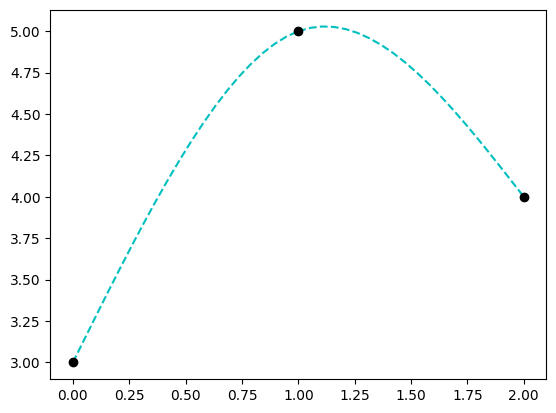

In [115]:
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt

b = np.array([[3], [5], [5], [4], [0], [0], [0], [0]])

A = np.array([[0, 0, 0, 1, 0, 0, 0, 0], [1, 1, 1, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 1, 1, 1],
              [0, 0, 0, 0, 8, 4, 2, 1], [3, 2, 1, 0, -3, -2, -1, 0], [6, 2, 0, 0, -6, -2, 0, 0],
              [0, 2, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 12, 2, 0, 0]])

# this uses linear algebra to solve Ax = b
x = np.linalg.solve(A, b)

# print the new vector, which is the coefficients.
print(x)

# These are the coefficients
a1 = x[0][0]
b1 = x[1][0]
c1 = x[2][0]
d1 = x[3][0]
a2 = x[4][0]
b2 = x[5][0]
c2 = x[6][0]
d2 = x[7][0]

x1 = np.linspace(0, 1, 20)
x2 = np.linspace(1, 2, 20)

# make data points using the cubic functions from the coefficients
y1 = a1*x1**3 + b1*x1**2 + c1*x1 + d1
y2 = a2*x2**3 + b2*x2**2 + c2*x2 + d2

# The 2 cubic functions fit the data points nicely.
plt.plot(x1, y1, '--c')
plt.plot(x2, y2, '--c')
plt.plot([0, 1, 2], [3, 5, 4], 'ko')

